# Activities List

Tasks
Hint: use the file Data_Marketing_Customer_Analysis_Round3.csv

check if there are highly correlated features and drop them (if there are any).
One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 3. ( Hint: check Dropfirst option).
for the first iteration, we will focus on the numericals data (numericals data frame) as our data source.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder #for our Label encoding
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
df = pd.read_csv("file:///Users/brunasantos/Documents/GitHub/Data_Marketing_Customer_Analysis_Round3.csv")

In [3]:
df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10689 non-null  object
 1   customer_lifetime_value        10689 non-null  int64 
 2   response                       10689 non-null  object
 3   coverage                       10689 non-null  object
 4   education                      10689 non-null  object
 5   effective_to_date              10689 non-null  object
 6   month                          10689 non-null  object
 7   employment_status              10689 non-null  object
 8   gender                         10689 non-null  object
 9   income                         10689 non-null  int64 
 10  location_code                  10689 non-null  object
 11  marital_status                 10689 non-null  object
 12  monthly_premium_auto           10689 non-null  int64 
 13  m

In [5]:
numerical_df = df.select_dtypes(include=[np.number])
categorical_df = df.select_dtypes(include=['object'])

In [6]:
numerical_df 

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [7]:
numerical_df.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [8]:
correlation_matrix = df.corr()

/var/folders/0h/qsc9xv295z7clcdd_1p3h2w00000gn/T/ipykernel_8838/4214245630.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [9]:
correlation_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.003732,0.404235,0.011912,0.017055,-0.032371,0.016789,0.232849
income,0.003732,1.000000,-0.002431,-0.026564,0.003846,0.018903,-0.004461,-0.111221
monthly_premium_auto,0.404235,-0.002431,1.000000,0.010036,0.019696,-0.008811,-0.018805,0.630149
months_since_last_claim,0.011912,-0.026564,0.010036,1.000000,-0.034086,0.001204,0.000814,0.013874
months_since_policy_inception,0.017055,0.003846,0.019696,-0.034086,1.000000,0.002554,-0.009719,0.004186
number_of_open_complaints,-0.032371,0.018903,-0.008811,0.001204,0.002554,1.000000,-0.000303,-0.010668
number_of_policies,0.016789,-0.004461,-0.018805,0.000814,-0.009719,-0.000303,1.000000,-0.008019
total_claim_amount,0.232849,-0.111221,0.630149,0.013874,0.004186,-0.010668,-0.008019,1.000000


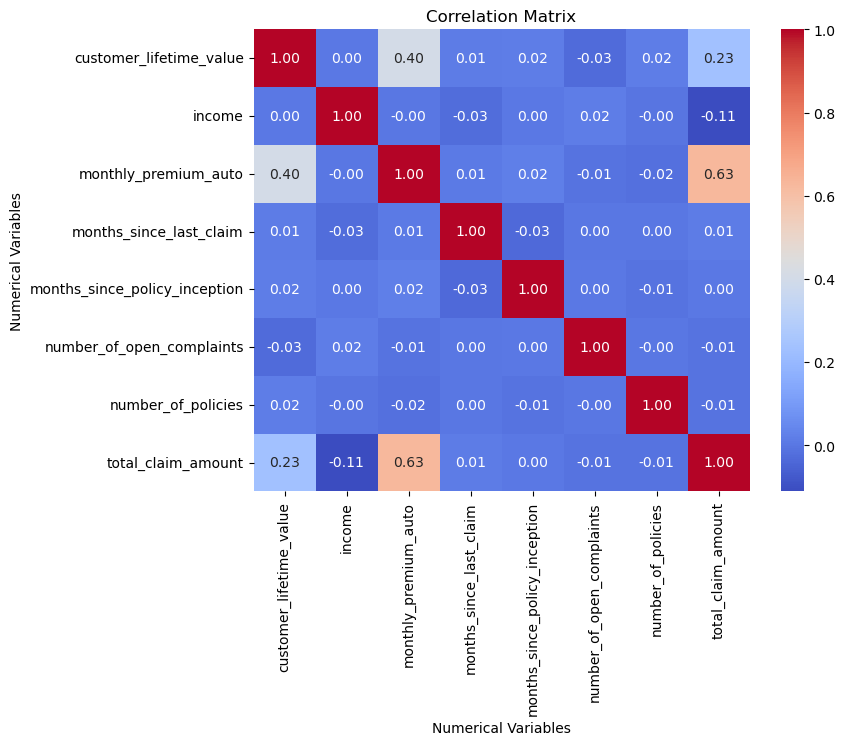

In [10]:
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set plot title and labels
plt.title('Correlation Matrix')
plt.xlabel('Numerical Variables')
plt.ylabel('Numerical Variables')

# Display the plot
plt.show()


In [11]:
categorical = df.select_dtypes(include=['object', 'category'])
numerical = df.select_dtypes(include=['int', 'float'])
print("Categorical variables:")
print(categorical.columns)
print("\nNumerical variables:")
print(numerical.columns)

Categorical variables:
Index(['region', 'response', 'coverage', 'education', 'effective_to_date',
       'month', 'employment_status', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

Numerical variables:
Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')


In [12]:
categorical_df

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [13]:
categorical_df.columns

Index(['region', 'response', 'coverage', 'education', 'effective_to_date',
       'month', 'employment_status', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [14]:
categorical_df["vehicle_class"].unique()

array(['four-door car', 'suv', 'two-door car', 'sports car', 'luxury car',
       'luxury suv'], dtype=object)

In [15]:
categorical_df["employment_status"].unique()

array(['employed', 'unemployed', 'medical leave', 'disabled', 'retired'],
      dtype=object)

In [16]:
categorical_df.columns

Index(['region', 'response', 'coverage', 'education', 'effective_to_date',
       'month', 'employment_status', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [17]:
# Create dummy variables for the 'Color' and 'Size' columns
dummy_nominals = ['region',  'response','effective_to_date', 'employment_status','marital_status','gender', 'policy_type']
final_data = pd.get_dummies(categorical_df, columns=dummy_nominals)
# Print the resulting DataFrame with dummy variables


In [18]:
final_data

,coverage,education,month,location_code,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,region_central,...,employment_status_retired,employment_status_unemployed,marital_status_divorced,marital_status_married,marital_status_single,gender_f,gender_m,policy_type_corporate auto,policy_type_personal auto,policy_type_special auto
0,basic,college,feb,suburban,corporate l3,offer3,agent,four-door car,medsize,1,...,0,0,0,1,0,0,1,1,0,0
1,basic,college,jan,suburban,personal l3,offer4,call center,four-door car,medsize,0,...,0,1,0,0,1,1,0,0,1,0
2,basic,bachelor,feb,suburban,personal l3,offer3,call center,suv,medsize,0,...,0,0,0,0,1,0,1,0,1,0
3,extended,college,jan,suburban,corporate l3,offer2,branch,four-door car,medsize,0,...,0,0,0,0,1,0,1,1,0,0
4,premium,bachelor,jan,suburban,personal l2,offer1,branch,four-door car,medsize,0,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,premium,bachelor,jan,suburban,personal l1,offer3,web,luxury car,medsize,1,...,0,1,0,1,0,1,0,0,1,0
10685,basic,college,jan,urban,personal l3,offer2,branch,four-door car,medsize,0,...,0,0,0,1,0,1,0,0,1,0
10686,extended,bachelor,feb,rural,corporate l3,offer1,web,luxury suv,medsize,1,...,0,0,0,1,0,1,0,1,0,0
10687,premium,college,feb,urban,personal l1,offer1,branch,suv,medsize,0,...,0,0,1,0,0,1,0,0,1,0


In [19]:
label_ordinals = ['coverage', "month", 'education','location_code','policy','renew_offer_type', 'sales_channel','vehicle_class', 'vehicle_size']


In [20]:
label_encoder = LabelEncoder()

In [21]:
for column in label_ordinals:
    final_data[column] = label_encoder.fit_transform(final_data[column])

In [22]:
final_data

,coverage,education,month,location_code,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,region_central,...,employment_status_retired,employment_status_unemployed,marital_status_divorced,marital_status_married,marital_status_single,gender_f,gender_m,policy_type_corporate auto,policy_type_personal auto,policy_type_special auto
0,0,1,0,1,2,2,0,0,1,1,...,0,0,0,1,0,0,1,1,0,0
1,0,1,1,1,5,3,2,0,1,0,...,0,1,0,0,1,1,0,0,1,0
2,0,0,0,1,5,2,2,4,1,0,...,0,0,0,0,1,0,1,0,1,0
3,1,1,1,1,2,1,1,0,1,0,...,0,0,0,0,1,0,1,1,0,0
4,2,0,1,1,4,0,1,0,1,0,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,2,0,1,1,3,2,3,1,1,1,...,0,1,0,1,0,1,0,0,1,0
10685,0,1,1,2,5,1,1,0,1,0,...,0,0,0,1,0,1,0,0,1,0
10686,1,0,0,0,2,0,3,2,1,1,...,0,0,0,1,0,1,0,1,0,0
10687,2,1,0,2,3,0,1,4,1,0,...,0,0,1,0,0,1,0,0,1,0


**Optional Task**


Begin by visually examining distributions (histograms) of the numerical features. Select a variable, call it varA, which takes on a wide range of numerical values, and another, varB, which has a noticeably large skew. For example, you might select customer_lifetime_value as a candidate varB which has skew.

varA
Use minmax transform to bring varA's values into the range [0,1].
Check that varA has been rescaled using a displot or a histogram

varB
Use StandardScaler or PowerTransform to reduce the skew and standardize varB's distribution.
Check that the result has zero mean, unit variance, and reduced skew using mean(), std(), and a plot of the PDF.



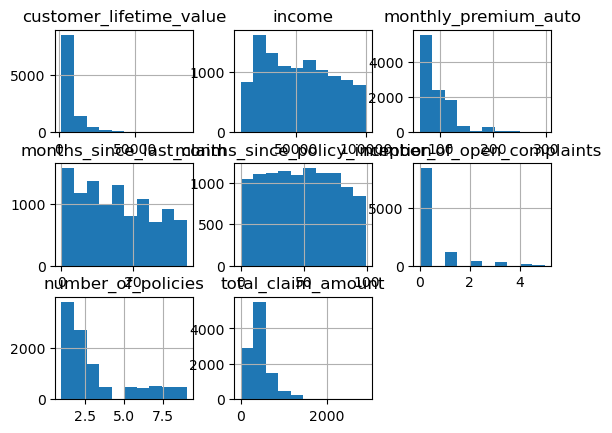

In [23]:
numerical.hist()
plt.show()

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()

In [26]:
numerical['income'] = scaler.fit_transform(numerical[['income']])

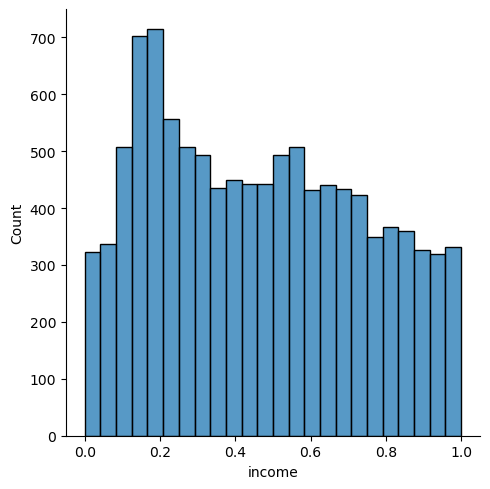

In [27]:
sns.displot(numerical.income)

In [28]:
from sklearn.preprocessing import PowerTransformer

In [29]:
transformer = PowerTransformer()

In [30]:
numerical['customer_lifetime_transformed'] = transformer.fit_transform(numerical[['customer_lifetime_value']])

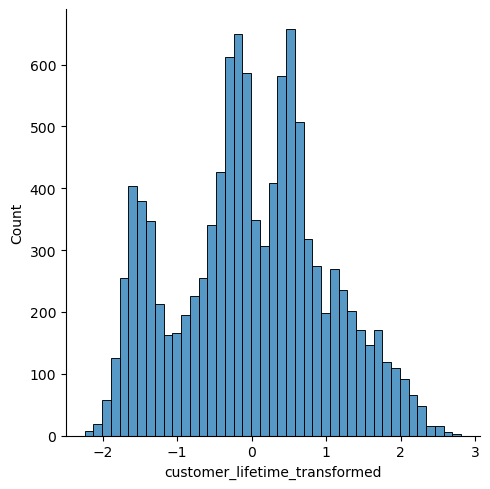

In [31]:
sns.displot(numerical.customer_lifetime_transformed)